# 一、手把手搭建神经网络

1.搭建单个神经元的前馈网络

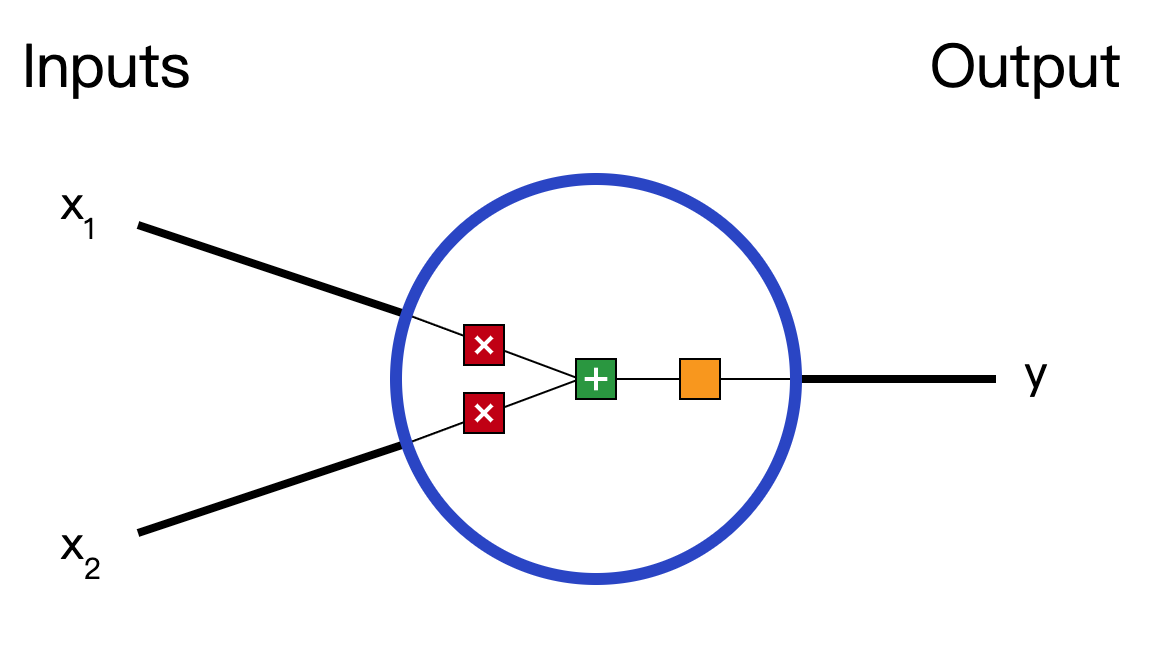

# （1）构建神经元

In [1]:
#导入数字计算包
import numpy as np

In [10]:
def sigmoid(x):
    # 激活函数: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

In [11]:
#设计一个神经元

class Neuron:
    #定义构造函数
    def __init__(self, weights, bias):
        self.weights  = weights
        self.bias = bias
    #前馈函数
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    

In [ ]:
weights  = np.array([-5, 
                     1
                    ]) # w1 = 0, w2 = 1
# bias = -2                    # b = 4
neuron = Neuron(weights, bias)   #构造神经元


In [13]:
# 输入数据（features）

x = np.array([2, 
              3])   # x1 = 2, x2 = 3

print(neuron.feedforward(x))


0.00012339457598623172


In [16]:
# 输入数据（features）
weights  = np.array([0, 1]) # w1 = 0, w2 = 1

bias = -2  

x = np.array([1, 2])   # x1 = 1, x2 = 2

print(neuron.feedforward(x))

0.0066928509242848554


# （2）把神经元连接成神经网络

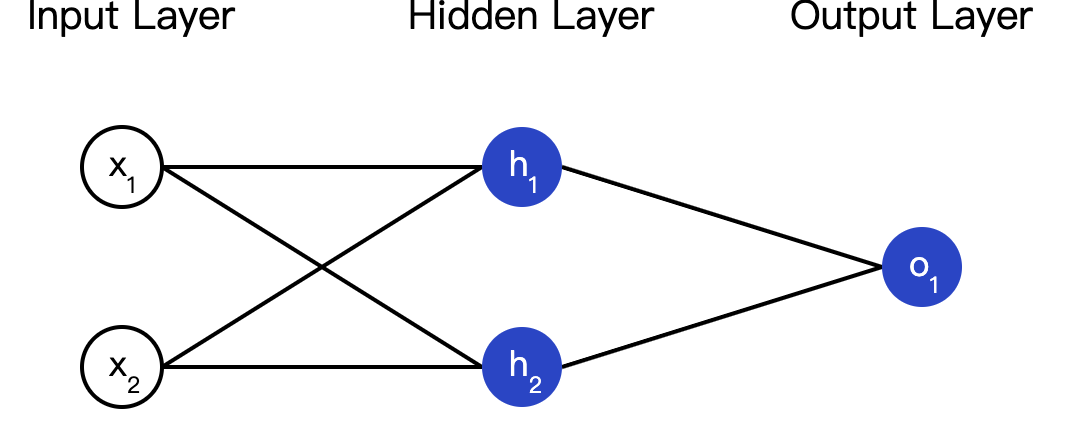

In [16]:
import numpy as np

class NeuralNetwork:
    def __init__(self):
        '''
      A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)
      Each neuron has the same weights and bias:
        - w = [0, 1]
        - b = 0
      '''
        weights = np.array([0, 1])
        bias = 0
        # The Neuron class here is from the previous section
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        # The inputs for o1 are the outputs from h1 and h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

 #各个权值是怎么确定的？

In [17]:
network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


###  插入语：画出各种激活函数

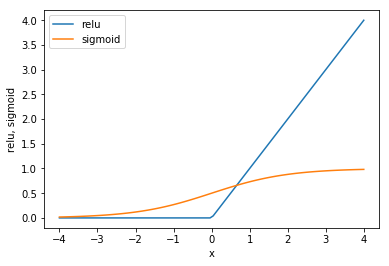

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import logistic


def sigmoid(x):
    # 激活函数: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

line = np.linspace(-4,4,100)


# plt.plot(line, np.tanh(line),label='tanh')
plt.plot(line, np.maximum(line,0),label='relu')
plt.plot(line, sigmoid(line),label='sigmoid')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu, sigmoid')
plt.show()

## （3）计算损失函数

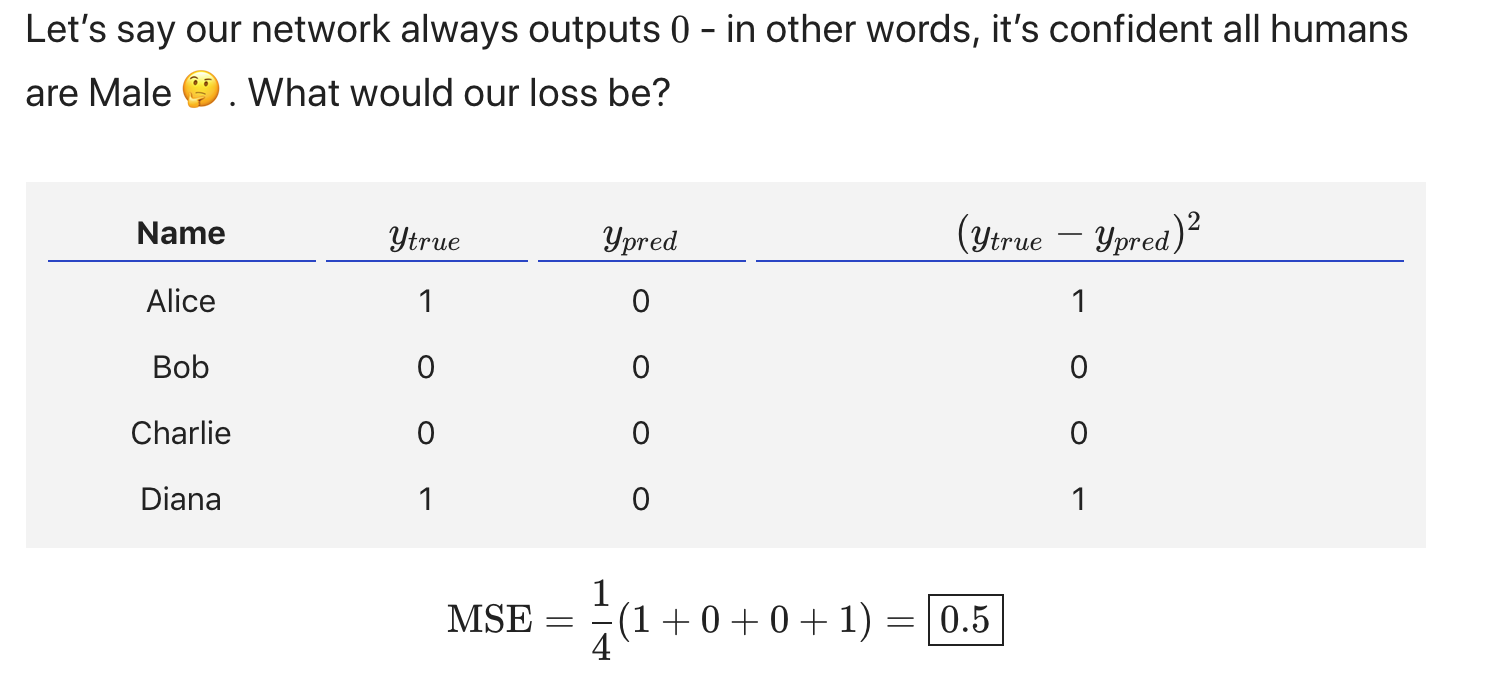

In [20]:
import numpy as np

def mse_loss(y_true, y_pred):
  # y_true and y_pred 具有相同的数组长度.
    #利用numpy数组，直接进行向量操作，否则还得使用for循环
  return ((y_true - y_pred) ** 2).mean()


In [21]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred)) # 0.5

0.5


## 训练网络——最小化损失函数

为了简化问题，假设我们的数据集中只有Alice：

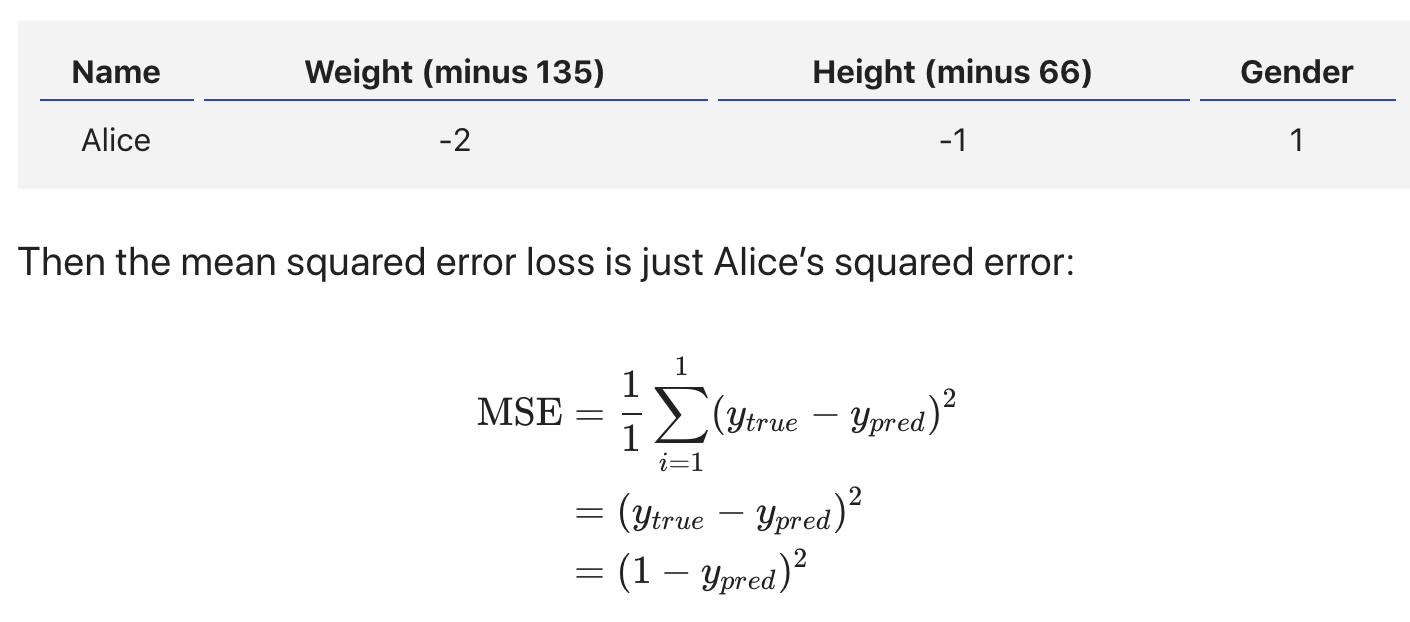

## （4）完整的神经网络

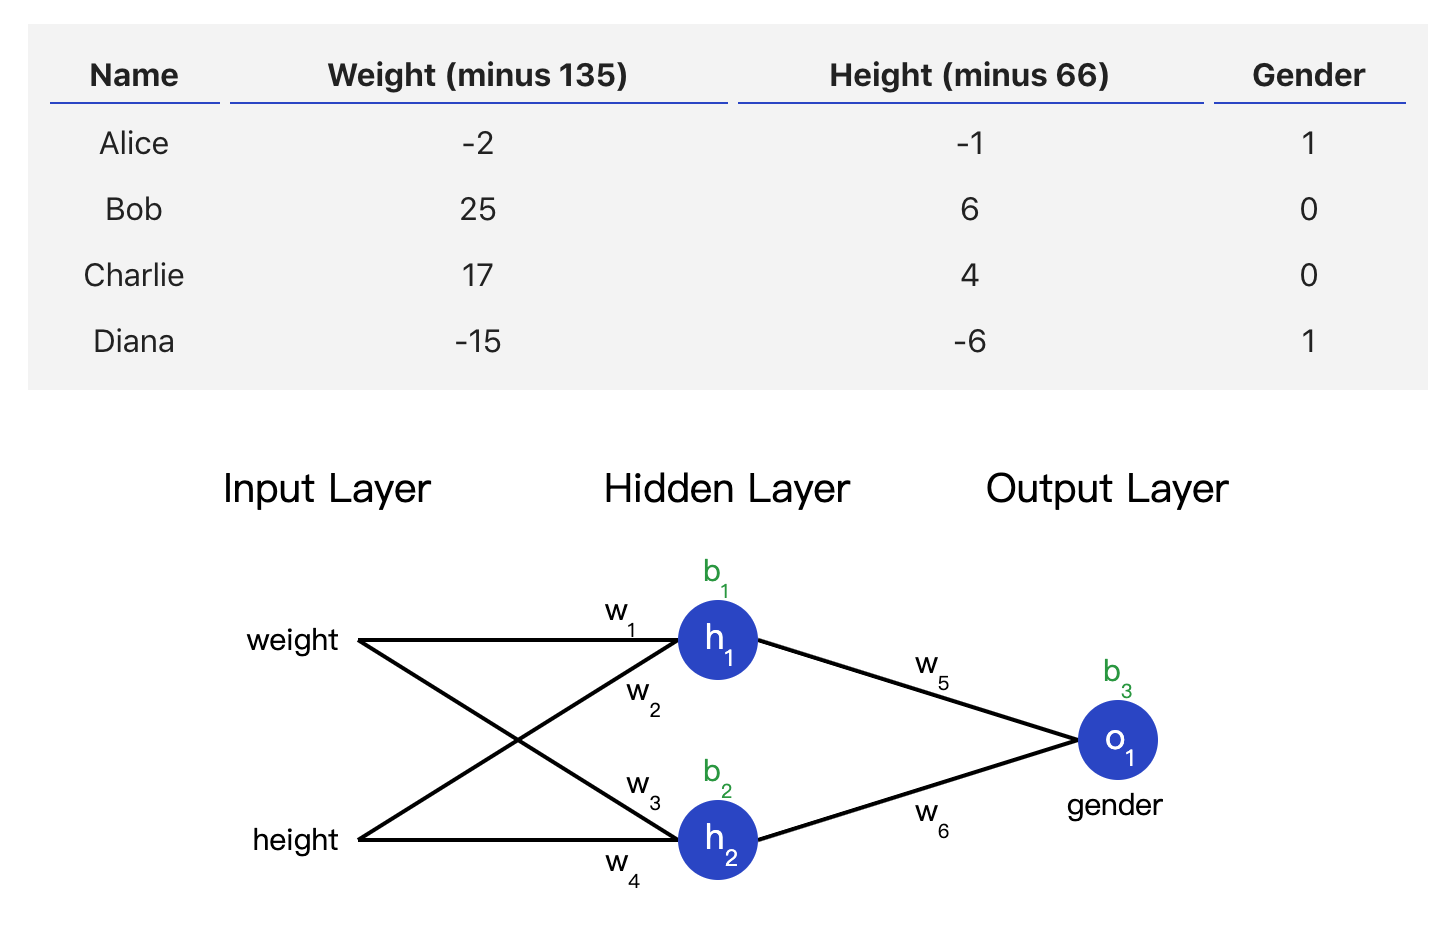

## 定义神经网络

In [23]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()


#设计单层网络的拓扑结构
class NeuronLayer():
    def __init__(self, num_input_neurons, num_neurons ):
        #构造函数保证每个链接的权值随机分为[-1,1]之间
        self.weights = 2 * np.random.random((num_input_neurons, num_neurons)) -1

class NeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))


In [25]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = NeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.449
Epoch 10 loss: 0.334
Epoch 20 loss: 0.078
Epoch 30 loss: 0.052
Epoch 40 loss: 0.040
Epoch 50 loss: 0.033
Epoch 60 loss: 0.028
Epoch 70 loss: 0.024
Epoch 80 loss: 0.021
Epoch 90 loss: 0.019
Epoch 100 loss: 0.017
Epoch 110 loss: 0.016
Epoch 120 loss: 0.014
Epoch 130 loss: 0.013
Epoch 140 loss: 0.012
Epoch 150 loss: 0.011
Epoch 160 loss: 0.011
Epoch 170 loss: 0.010
Epoch 180 loss: 0.009
Epoch 190 loss: 0.009
Epoch 200 loss: 0.008
Epoch 210 loss: 0.008
Epoch 220 loss: 0.008
Epoch 230 loss: 0.007
Epoch 240 loss: 0.007
Epoch 250 loss: 0.007
Epoch 260 loss: 0.006
Epoch 270 loss: 0.006
Epoch 280 loss: 0.006
Epoch 290 loss: 0.006
Epoch 300 loss: 0.005
Epoch 310 loss: 0.005
Epoch 320 loss: 0.005
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.004
Epoch 370 loss: 0.004
Epoch 380 loss: 0.004
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.003

In [26]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M


Emily: 0.966
Frank: 0.038


# （二） 手把手搭建神经网络2

任务：通过学习完成如下真值表

![任务](nn-task.png)


### 搭建的网络拓扑结构

这里的网络拓扑结构（比如，网络多少层，每层多少个神经元）纯粹属于个人经验，不唯一。

![tuopo](simple-nn-2.png)

### （1）导入必要的库

# 使用sklearn搭建神经网络

In [30]:
#导入多层感知机分类器
from sklearn.neural_network import MLPClassifier
#导入红酒数据集
from sklearn.datasets import load_wine
#导入训练集合和测试集合分割工具
from sklearn.model_selection import train_test_split

In [31]:
#读取数据
wine = load_wine()
#仅仅取前两个特征
X = wine.data[:, :2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [32]:
#创建多层感知机分类器
mlp = MLPClassifier(solver = "lbfgs")
#solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
#训练感知机
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## 激活函数说明
activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’

Activation function for the hidden layer.

‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

## 隐含层结构
 hidden_layer_sizes=(100,)
 
 默认值为1层，每层有100个神经元，
 
 如果 hidden_layer_sizes=(10,10)
 
 表示有10个隐含层，每层10个神经元
 

## 导入绘图工具

In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

#使用不同的颜色表示不同的分类
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))


In [37]:
xx.shape

(338, 286)

In [38]:
yy.shape

(338, 286)

## 预测meshgrid中的值

In [39]:
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

In [40]:
Z.shape

(96668,)

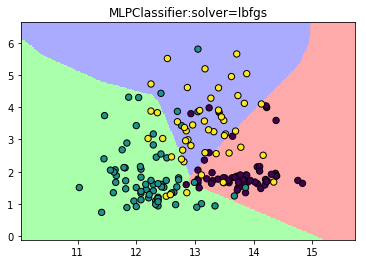

In [41]:
Z = Z.reshape(xx.shape)
plt.figure()
#Create a pseudocolor plot with a non-regular rectangular grid.
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=40)
#c : color, sequence, or sequence of color, optional
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:solver=lbfgs")

plt.show()

## 改变网络的拓扑结构，再尝试分类效果

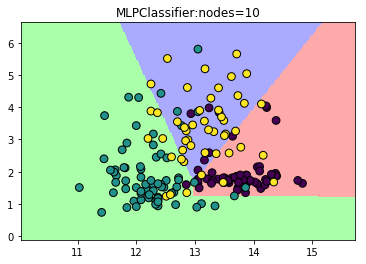

In [42]:
#创建多层感知机分类器,隐含层节点仅为10
mlp_10 = MLPClassifier(solver = "lbfgs",hidden_layer_sizes=[10])
#solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
#训练感知机
mlp_10.fit(X_train, y_train)

Z1 = mlp_10.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:nodes=10")

plt.show()

## 增加网络的层数，再看看呢？

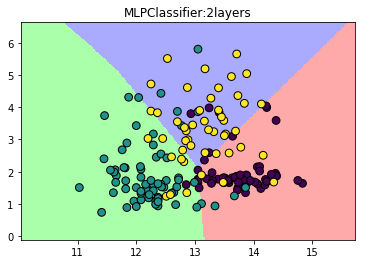

In [43]:
mlp_2L=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10])
mlp_2L.fit(X_train, y_train)
Z2 = mlp_2L.predict(np.c_[xx.ravel(), yy.ravel()])

Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2layers")

plt.show()

## 替换一下激活函数，再试一试呢？

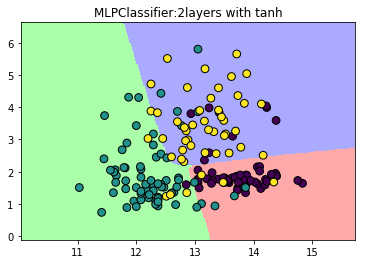

In [44]:
#由默认的LeRU变更为tanh
mlp_tanh=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10],
                    activation='tanh')
mlp_tanh.fit(X_train, y_train)
Z3 = mlp_tanh.predict(np.c_[xx.ravel(), yy.ravel()])

Z3 = Z3.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z3, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2layers with tanh")

plt.show()

## 增加一个L2惩罚项，再看看呢？

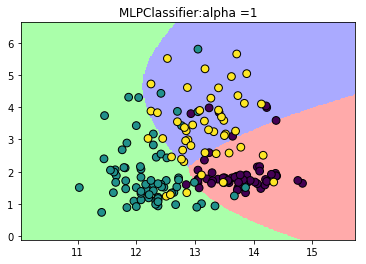

In [45]:
mlp_alpha=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10],
                    activation='tanh',alpha=1)
mlp_alpha.fit(X_train, y_train)
Z4 = mlp_alpha.predict(np.c_[xx.ravel(), yy.ravel()])

Z4 = Z4.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z4, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:alpha =1")

plt.show()